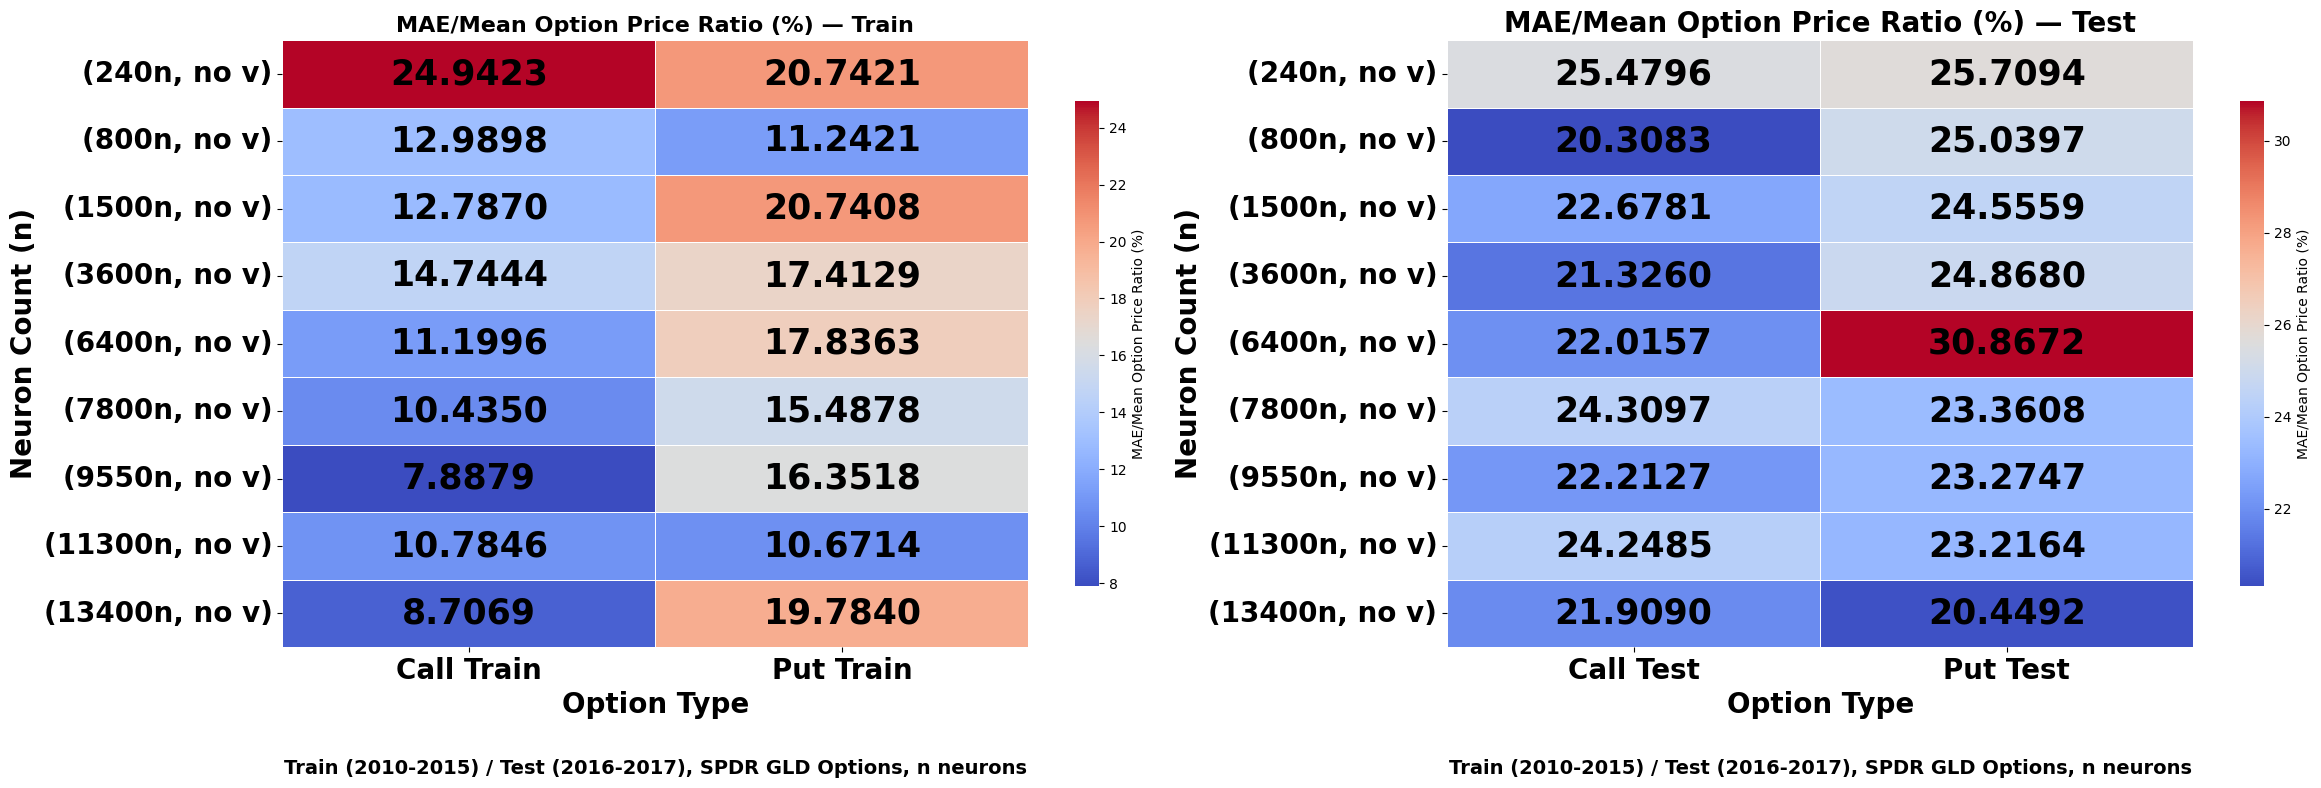

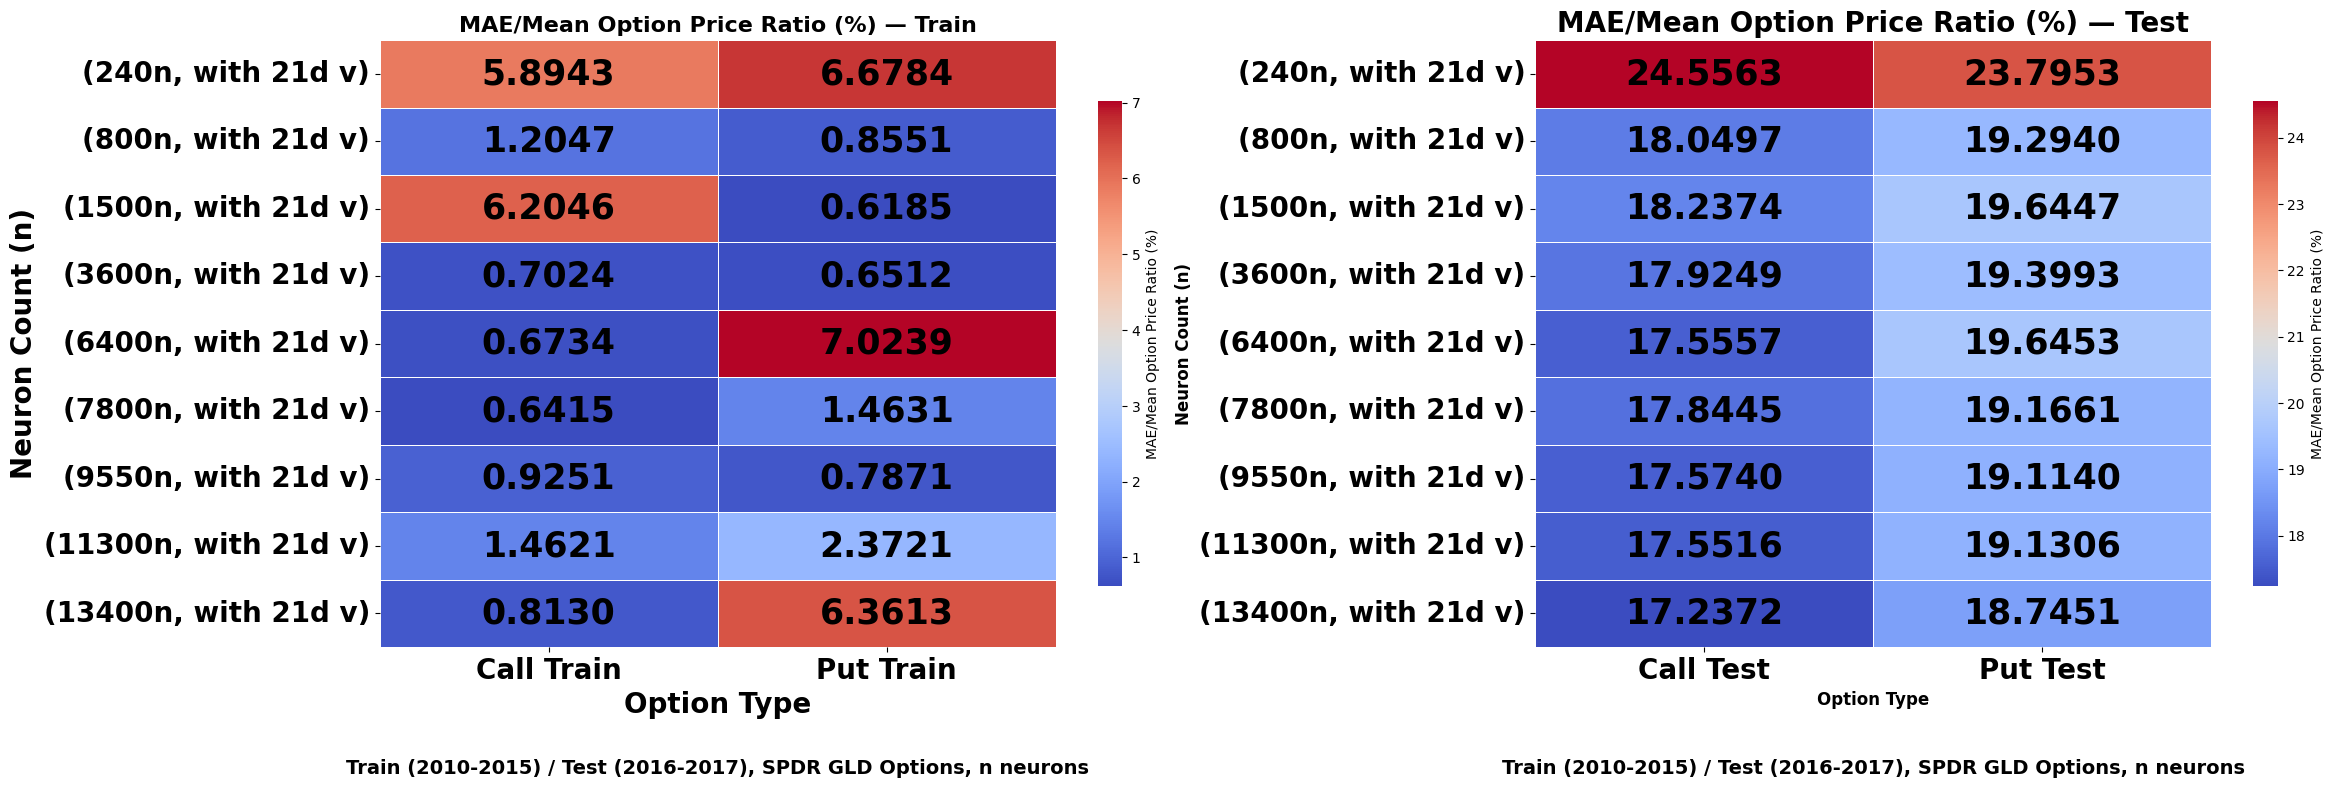

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv("mae_percent_table.csv", index_col=0)


df.index = df.index.str.strip()


df_plot = df.drop(columns=["Mean"])


no_v_df = df_plot[df_plot.index.str.contains("no v")]
v21_df = df_plot[df_plot.index.str.contains("21d v")]


no_v_train = no_v_df[["Call Train", "Put Train"]]
no_v_test  = no_v_df[["Call Test", "Put Test"]]

v21_train = v21_df[["Call Train", "Put Train"]]
v21_test  = v21_df[["Call Test", "Put Test"]]


note_text_short = "Train (2010-2015) / Test (2016-2017), SPDR GLD Options, n neurons"


fig, axes = plt.subplots(1, 2, figsize=(24, 8))

sns.heatmap(no_v_train, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5,
            annot_kws={"size": 25, "weight": "bold", "color": "black"},
            cbar_kws={'label': 'MAE/Mean Option Price Ratio (%)', 'shrink': 0.8},
            ax=axes[0])
axes[0].set_title("MAE/Mean Option Price Ratio (%) — Train", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Neuron Count (n)", fontsize=20, fontweight='bold')
axes[0].set_xlabel("Option Type", fontsize=20, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, fontsize=20, weight='bold')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=20, weight='bold')
axes[0].text(0.5, -0.2, note_text_short, ha='center', va='center', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

sns.heatmap(no_v_test, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5,
            annot_kws={"size": 25, "weight": "bold", "color": "black"},
            cbar_kws={'label': 'MAE/Mean Option Price Ratio (%)', 'shrink': 0.8},
            ax=axes[1])
axes[1].set_title("MAE/Mean Option Price Ratio (%) — Test", fontsize=20, fontweight='bold')
axes[1].set_ylabel("Neuron Count (n)", fontsize=20, fontweight='bold')
axes[1].set_xlabel("Option Type", fontsize=20, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, fontsize=20, weight='bold')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=20, weight='bold')
axes[1].text(0.5, -0.2, note_text_short, ha='center', va='center', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

plt.tight_layout()
plt.savefig("ann_mop_without_v.pdf", dpi=300)
plt.show()
plt.close()


fig, axes = plt.subplots(1, 2, figsize=(24, 8))

sns.heatmap(v21_train, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5,
            annot_kws={"size": 25, "weight": "bold", "color": "black"},
            cbar_kws={'label': 'MAE/Mean Option Price Ratio (%)', 'shrink': 0.8},
            ax=axes[0])
axes[0].set_title("MAE/Mean Option Price Ratio (%) — Train", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Neuron Count (n)", fontsize=20, fontweight='bold')
axes[0].set_xlabel("Option Type", fontsize=20, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, fontsize=20, weight='bold')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=20, weight='bold')
axes[0].text(0.5, -0.2, note_text_short, ha='center', va='center', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

sns.heatmap(v21_test, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5,
            annot_kws={"size": 25, "weight": "bold", "color": "black"},
            cbar_kws={'label': 'MAE/Mean Option Price Ratio (%)', 'shrink': 0.8},
            ax=axes[1])
axes[1].set_title("MAE/Mean Option Price Ratio (%) — Test", fontsize=20, fontweight='bold')
axes[1].set_ylabel("Neuron Count (n)", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Option Type", fontsize=12, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, fontsize=20, weight='bold')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=20, weight='bold')
axes[1].text(0.5, -0.2, note_text_short, ha='center', va='center', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

plt.tight_layout()
plt.savefig("ann_mop_with_v.pdf", dpi=300)
plt.show()
plt.close()


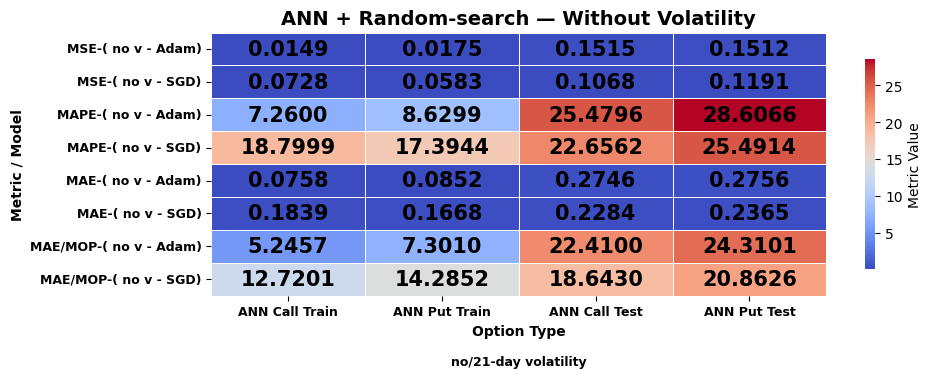

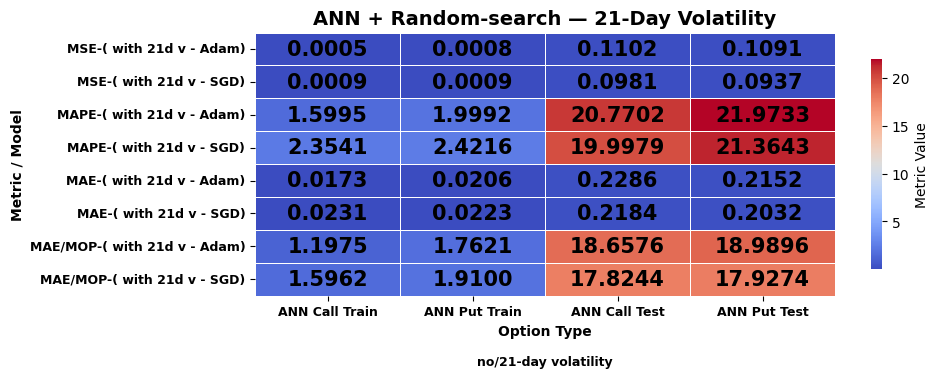

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


mse_df      = pd.read_csv("mse_random.csv", index_col=0)
mape_df     = pd.read_csv("random_mape.csv", index_col=0)
mae_df      = pd.read_csv("ann_random_mae.csv", index_col=0)
mae_mop_df  = pd.read_csv("mae_percent_table_random.csv", index_col=0)


for df in [mse_df, mape_df, mae_df, mae_mop_df]:
    df.index = df.index.str.strip()
    if "Mean" in df.columns:
        df.drop(columns=["Mean"], inplace=True)

    # Simplify column names
    df.columns = df.columns.str.replace(r"\s*\+ Random-search", "", regex=True)


datasets = {
    "Without Volatility": mse_df.index.str.contains("no v"),
    "21-Day Volatility": mse_df.index.str.contains("21d v")
}


note_text = "no/21-day volatility"


for vol_name, mask in datasets.items():
    # Subset per volatility
    mse_sub      = mse_df[mask]
    mape_sub     = mape_df[mask]
    mae_sub      = mae_df[mask]
    mae_mop_sub  = mae_mop_df[mask]

    combined_df = pd.concat([
        mse_sub.assign(Metric='MSE'),
        mape_sub.assign(Metric='MAPE'),
        mae_sub.assign(Metric='MAE'),
        mae_mop_sub.assign(Metric='MAE/MOP')
    ])

    combined_df.index = pd.MultiIndex.from_tuples(
        [(metric, model) for metric, model in zip(combined_df['Metric'], combined_df.index)],
        names=["Metric", "Model"]
    )
    combined_df.drop(columns=["Metric"], inplace=True)

    plt.figure(figsize=(10, 0.5*len(combined_df)))
    sns.heatmap(
        combined_df,
        annot=True, fmt=".4f", cmap="coolwarm",
        linewidths=0.5, cbar_kws={'shrink': 0.8, 'label': 'Metric Value'},
        annot_kws={"size": 15, "weight": "bold", "color": "black"}
    )
    plt.title(f"ANN + Random-search — {vol_name}", fontsize=14, fontweight='bold')
    plt.xlabel("Option Type", fontsize=10, fontweight='bold')
    plt.ylabel("Metric / Model", fontsize=10, fontweight='bold')
    plt.xticks(rotation=0, fontsize=9, weight='bold')
    plt.yticks(rotation=0, fontsize=9, weight='bold')

    plt.text(0.5, -0.25, note_text, ha='center', va='center', fontsize=9, fontweight='bold', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.savefig(f"ann_random_all_metrics_{vol_name.replace(' ', '_').lower()}.pdf", dpi=300)
    plt.show()
    plt.close()
